<a href="https://colab.research.google.com/github/yhdonnie/azml/blob/circleci-project-setup/azml_143_RNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Keras RNN 으로 여행자 수 예측

1. 패키지 수입 및 파라미터 설정

In [1]:
# 수입
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.layers import Dense
from keras.layers import LSTM, InputLayer
from keras.models import Sequential 
from sklearn.model_selection import train_test_split

In [2]:
# 파라미터 (MY_SHAPE 에서 ,1 이 필요한 이유)
MY_PAST = 12
MY_SPLIT = 0.8
MY_HIDDEN = 300
MY_SHAPE = (MY_PAST, 1)
MY_EPOCH = 300

2. 데이터 처리

In [3]:
# 데이터 읽기
raw = pd.read_csv('/content/drive/MyDrive/data/airline.csv',
                  header=None,
                  usecols=[1])


#  샘플  출력
# print(raw.head(15))
# print(raw.describe())

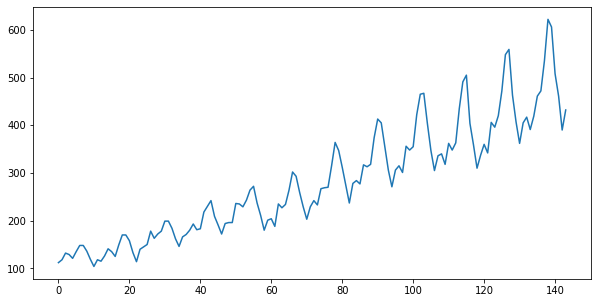

In [4]:
plt.figure(figsize=(10,5))
plt.plot(raw)

In [5]:
# 데이터 정규화  (정규화하면  pandas 가 numpy 가 됨)
scaler = MinMaxScaler()

#scaler = StandardScaler()
s_data = scaler.fit_transform(raw)
# s_data =(s_data-0.5)*2

print(type(s_data))
#print(s_data)
# print(s_data.flatten())
# plt.figure(figsize=(10,5))
# plt.plot(s_data)


<class 'numpy.ndarray'>


In [6]:
# 데이터 분할 
data = []
for i in range(len(s_data) - MY_PAST):
    data.append(s_data[i: i + MY_PAST + 1])

print('한 묶음의 크기:', len(data[0]))
print('총 묶음의 수:', len(data))
print('첫번째 묶음 내용/n', data[0])
print('두번째 묶음 내용/n', data[1])

한 묶음의 크기: 13
총 묶음의 수: 132
첫번째 묶음 내용/n [[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]]
두번째 묶음 내용/n [[0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]]


In [7]:
#  데이러틑  numpy 로 전환
print(type(data))
data = np.array(data)
print(type(data))

# 묶음들을 임의로 섞음: 시계열 안의 데이터의 순서는 안망가짐 (132, 13, 1--숫자 하나하나가 다 한차원 data)
# np.random.shuffle(data)
print(data.shape)
# print(data)

# 데이터를 입력과 출력으로 분할 (: 132개 다 사용한다)
X_data = data[:, 0:MY_PAST]
Y_data = data[:, -1]

print('입력 데이터 모양',  X_data.shape)
print('출력 데이터 모양',  Y_data.shape)



<class 'list'>
<class 'numpy.ndarray'>
(132, 13, 1)
입력 데이터 모양 (132, 12, 1)
출력 데이터 모양 (132, 1)


In [8]:
# 데이터 4분할
X_train, X_test, Y_train, Y_test = train_test_split(X_data, 
                                                    Y_data, 
                                                    train_size= MY_SPLIT,
                                                    shuffle=False)

# 최종 데이터 모양 출력
print('학습용 입력 데이터 모양:', X_train.shape)
print('학습용 출력 데이터 모양:', Y_train.shape)
print('평가용 입력 데이터 모양:', X_test.shape)
print('평가용 출력 데이터 모양:', Y_test.shape)

학습용 입력 데이터 모양: (105, 12, 1)
학습용 출력 데이터 모양: (105, 1)
평가용 입력 데이터 모양: (27, 12, 1)
평가용 출력 데이터 모양: (27, 1)


3. 인공 신경망 구현

In [9]:
# RNN 구현
model = Sequential()

model.add(InputLayer(input_shape=MY_SHAPE))

model.add(LSTM(units = MY_HIDDEN))

# model.add(Dense(units=1,
#                activation='sigmoid'))

model.add(Dense(units=1,
                activation='tanh'))

print('RNN 요약')
model.summary()

RNN 요약
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 300)               362400    
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


4. 인공 신경망 학습

In [10]:
# RNN 학습 설정
#model.compile(optimizer='rmsprop',
model.compile(optimizer='adam',
              loss ='mae')
            #    loss = 'mape')
            #   metrics = ['acc'])

#  정확도 필요없어서 뺌   metrics = ['acc'])

print('학습시작')
begin = time()

model.fit(x=X_train,
          y=Y_train,
          epochs = MY_EPOCH,
          verbose=0)

end=time()
print('학습 계산: {:.2f}'.format(end - begin))


학습시작
학습 계산: 44.42


5. 인공신경망 평가

In [11]:
# RNN 평가 ..  regression 에서 정확도는 의미 없음. 손실값만 봄
score = model.evaluate(x=X_test,
                       y=Y_test,
                       verbose=0)

# print('최종 손실값:', score[0])

# print('최종 정확도', score[1])

print('최종 손실값:', score)


최종 손실값: 0.08389449864625931


6. 인공 신경망 예측

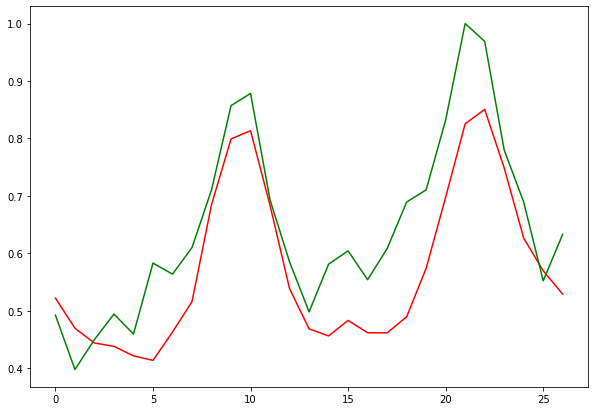

In [12]:
# RNN으로 예측
pred = model.predict(x=X_test)

# 예측결과 및 정답 그래프 그리기
plt.figure(figsize=(10,7))
plt.plot(pred, 'r')
#  묶음을 임의로 묵은거 해제
plt.plot(Y_test, 'g')

In [13]:
print('역전환 전:', pred)
print(pred.shape)

# 데이터 역전환 (sigmoid 함수를 원래로 되돌리는거)
pred = scaler.inverse_transform(pred)

print('역전환 후:', pred)
print(pred.shape)

# sqeeze 결과
# tmp = np.squeeze(pred)
tmp = np.squeeze(pred).astype(int)
print('squeeze 후:', tmp)
print(tmp.shape)

역전환 전: [[0.5220452 ]
 [0.46948135]
 [0.4438224 ]
 [0.43804696]
 [0.421392  ]
 [0.41358772]
 [0.46287343]
 [0.51599807]
 [0.6847614 ]
 [0.7991538 ]
 [0.81343335]
 [0.68334246]
 [0.53839946]
 [0.46850654]
 [0.45614862]
 [0.48313364]
 [0.46167666]
 [0.46145177]
 [0.48937976]
 [0.5739355 ]
 [0.6976569 ]
 [0.82547444]
 [0.85050625]
 [0.748728  ]
 [0.6264616 ]
 [0.56957316]
 [0.528811  ]]
(27, 1)
역전환 후: [[374.41943]
 [347.19135]
 [333.9    ]
 [330.90833]
 [322.28104]
 [318.23843]
 [343.76843]
 [371.28702]
 [458.70642]
 [517.9617 ]
 [525.35846]
 [457.9714 ]
 [382.89093]
 [346.6864 ]
 [340.285  ]
 [354.2632 ]
 [343.14853]
 [343.03204]
 [357.49872]
 [401.2986 ]
 [465.3863 ]
 [531.59576]
 [544.56226]
 [491.8411 ]
 [428.50714]
 [399.0389 ]
 [377.9241 ]]
(27, 1)
squeeze 후: [374 347 333 330 322 318 343 371 458 517 525 457 382 346 340 354 343 343
 357 401 465 531 544 491 428 399 377]
(27,)


In [14]:
# 정답 출력
print('역전환 전 정답:', Y_test)
# 정답 역전환
Y_test = scaler.inverse_transform(Y_test)
print('역전환 후 정답:', Y_test)

역전환 전 정답: [[0.49227799]
 [0.3976834 ]
 [0.44980695]
 [0.49420849]
 [0.45945946]
 [0.58301158]
 [0.56370656]
 [0.61003861]
 [0.71042471]
 [0.85714286]
 [0.87837838]
 [0.69305019]
 [0.58494208]
 [0.4980695 ]
 [0.58108108]
 [0.6042471 ]
 [0.55405405]
 [0.60810811]
 [0.68918919]
 [0.71042471]
 [0.83204633]
 [1.        ]
 [0.96911197]
 [0.77992278]
 [0.68918919]
 [0.55212355]
 [0.63320463]]
역전환 후 정답: [[359.]
 [310.]
 [337.]
 [360.]
 [342.]
 [406.]
 [396.]
 [420.]
 [472.]
 [548.]
 [559.]
 [463.]
 [407.]
 [362.]
 [405.]
 [417.]
 [391.]
 [419.]
 [461.]
 [472.]
 [535.]
 [622.]
 [606.]
 [508.]
 [461.]
 [390.]
 [432.]]


In [15]:
# # RNN으로 예측
# pred = model.predict(x=X_test)

# # 예측결과 및 정답 그래프 그리기
# plt.figure(figsize=(10,7))
# plt.plot(pred, 'r')
# #  묶음을 임의로 묵은거 해제
# plt.plot(Y_test, 'g')